## Import thư viện

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50

import matplotlib.pyplot as plt
import seaborn as sns

## Đọc dữ liệu

In [2]:
results_df = pd.read_csv('results.csv')
results_df.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14 00:00:00,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14 00:00:00,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14 00:00:00,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14 00:00:00,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14 00:00:00,Man City,Leeds,1,1,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Khám phá dữ liệu

#### Số dòng, số cột

In [3]:
num_rows, num_cols = results_df.shape
print(f'Rows: {num_rows} \nCols: {num_cols}')

Rows: 10424 
Cols: 23


#### Ý nghĩa các cột

- FTHG: Full Time Home Team Goals
- FTAG: Full Time Away Team Goals
- FTR: Full Time Result (H=Home Win, D=Draw, A=Away Win)
- HTHG: Half Time Home Team Goals
- HTAG: Half Time Away Team Goals
- HTR: Half Time Result (H=Home Win, D=Draw, A=Away Win)
- Referee: Match Referee
- HS: Home Team Shots
- AS: Away Team Shots
- HST: Home Team Shots on Target
- AST: Away Team Shots on Target
- HC: Home Team Corners
- AC: Away Team Corners
- HF: Home Team Fouls Committed
- AF: Away Team Fouls Committed
- HY: Home Team Yellow Cards
- AY: Away Team Yellow Cards
- HR: Home Team Red Cards
- AR: Away Team Red Cards

#### Kiểm tra trùng lặp

In [4]:
duplicate = results_df.duplicated()
duplicate[duplicate == True]

Series([], dtype: bool)

- Dữ liệu không có dòng trùng lặp

#### Kiểu dữ liệu của từng cột

In [5]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10424 entries, 0 to 10423
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10424 non-null  object 
 1   Date      10424 non-null  object 
 2   HomeTeam  10424 non-null  object 
 3   AwayTeam  10424 non-null  object 
 4   FTHG      10424 non-null  int64  
 5   FTAG      10424 non-null  int64  
 6   FTR       10424 non-null  object 
 7   HTHG      9500 non-null   float64
 8   HTAG      9500 non-null   float64
 9   HTR       9500 non-null   object 
 10  Referee   7600 non-null   object 
 11  HS        7600 non-null   float64
 12  AS        7600 non-null   float64
 13  HST       7600 non-null   float64
 14  AST       7600 non-null   float64
 15  HC        7600 non-null   float64
 16  AC        7600 non-null   float64
 17  HF        7600 non-null   float64
 18  AF        7600 non-null   float64
 19  HY        7600 non-null   float64
 20  AY        7600 non-null   fl

## Tiền xử lí

In [6]:
results_df[results_df.isnull().any(axis=1)]

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14 00:00:00,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14 00:00:00,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14 00:00:00,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14 00:00:00,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14 00:00:00,Man City,Leeds,1,1,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,1999-00,2000-05-14 00:00:00,Sheffield Weds,Leicester,4,0,H,2.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2820,1999-00,2000-05-14 00:00:00,Southampton,Wimbledon,2,0,H,0.0,0.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2821,1999-00,2000-05-14 00:00:00,Tottenham,Sunderland,3,1,H,1.0,1.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2822,1999-00,2000-05-14 00:00:00,Watford,Coventry,1,0,H,1.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Các cột HTHG HTAG HS AS HST AST HC AC HF AF HY AY HR AR và HTR Referee có tỉ lệ giá trị thiếu khá cao từ năm mùa giải năm 1993-94 tới mùa giải 1999-00 vì thế chúng ta sẽ bắt đầu khám phá dữ liệu từ năm 2000

In [7]:
df = results_df.dropna(axis = 0, how = 'any')
df = df.reset_index(drop = True)
df

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-01,2000-08-19 00:00:00,Charlton,Man City,4,0,H,2.0,0.0,H,Rob Harris,17.0,8.0,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000-01,2000-08-19 00:00:00,Chelsea,West Ham,4,2,H,1.0,0.0,H,Graham Barber,17.0,12.0,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000-01,2000-08-19 00:00:00,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,Barry Knight,6.0,16.0,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000-01,2000-08-19 00:00:00,Derby,Southampton,2,2,D,1.0,2.0,A,Andy D'Urso,6.0,13.0,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000-01,2000-08-19 00:00:00,Leeds,Everton,2,0,H,2.0,0.0,H,Dermot Gallagher,17.0,12.0,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,2019-20,2020-07-26 16:00:00,Leicester,Man United,0,2,A,0.0,0.0,D,M Atkinson,14.0,7.0,3.0,3.0,3.0,3.0,12.0,11.0,1.0,4.0,1.0,0.0
7596,2019-20,2020-07-26 16:00:00,Man City,Norwich,5,0,H,2.0,0.0,H,C Pawson,31.0,5.0,10.0,4.0,9.0,0.0,7.0,4.0,1.0,1.0,0.0,0.0
7597,2019-20,2020-07-26 16:00:00,Newcastle,Liverpool,1,3,A,1.0,1.0,D,A Taylor,3.0,14.0,2.0,6.0,2.0,4.0,11.0,5.0,1.0,0.0,0.0,0.0
7598,2019-20,2020-07-26 16:00:00,Southampton,Sheffield United,3,1,H,0.0,1.0,A,P Bankes,13.0,5.0,4.0,3.0,9.0,1.0,9.0,16.0,0.0,1.0,0.0,0.0


- Dữ liệu sau khi tiền xử lí

## Đặt câu hỏi 

 #### Số bàn thắng tương ứng như thế nào với số trận thắng của các đội trong mùa giải 3 mùa giải gần đây nhất ? Từ đó rút ra được điều gì ?

- Mục tiêu: Thống kê được xếp hạng của các đội, tổng số bàn thắng của cả lượt đi và lượt về. Từ đó đánh giá số trận thắng của các đội và số bàn thắng có mối quan hệ như thế nào.

#### Lấy danh sách 3 mùa giải gần nhất, các cột cần thiết gồm:
- Season(Mùa giải)
- HomeTeam(Đội nhà) 
- FTR(Kết quả)
- AwayTeam(Đội khách)
- FTHG(Số bàn thắng đội nhà)
- FTAG(Số bàn thắng đội khách)

In [8]:
season_list = df.groupby('Season')['Season'].sum().index
season_list = season_list[-3:]

In [9]:
season = df[df['Season'].isin(season_list[-3:]) == True].reset_index(drop = True)
season_scored = season[['Season', 'HomeTeam', 'FTR', 'AwayTeam', 'FTHG', 'FTAG']]

#### Thống kê sân nhà (Gồm số trận thắng, số bàn thắng)

In [19]:
Home = season_scored.groupby(['Season', 'HomeTeam', 'FTR']).agg({'FTAG': 'count', 'FTHG': 'sum'})

Home = Home.reset_index('FTR')

Total_Home_Goal = Home['FTHG'].sum(level = ['Season','HomeTeam'])

Home = Home.rename({'FTAG':'HomeWin'}, axis = 1)
Home = Home[Home['FTR'] == 'H']
Home = Home.drop('FTHG', axis = 1)

Home = Home.join(Total_Home_Goal)
Home = Home.reset_index('HomeTeam')
Home.head(10)

,HomeTeam,FTR,HomeWin,FTHG
Season,,,,
2017-18,Arsenal,H,15,54
2017-18,Bournemouth,H,7,26
2017-18,Brighton,H,7,24
2017-18,Burnley,H,7,16
2017-18,Chelsea,H,11,30
2017-18,Crystal Palace,H,7,29
2017-18,Everton,H,10,28
2017-18,Huddersfield,H,6,16
2017-18,Leicester,H,7,25


#### Thống kê sân khách (Gồm số trận thắng, số bàn thắng)

In [20]:
Away = season_scored.groupby(['Season', 'AwayTeam', 'FTR']).agg({'FTHG': 'count', 'FTAG': 'sum'})
Away = Away.reset_index('FTR')

Total_Away_Goal = Away['FTAG'].sum(level = ['Season','AwayTeam'])

Away = Away.rename({'FTHG':'AwayWin'}, axis = 1)
Away = Away[Away['FTR'] == 'A']
Away = Away.drop('FTAG', axis = 1)

Away = Away.join(Total_Away_Goal)
Away = Away.reset_index('AwayTeam')
Away.head(10)

,AwayTeam,FTR,AwayWin,FTAG
Season,,,,
2017-18,Arsenal,A,4,20
2017-18,Bournemouth,A,4,19
2017-18,Brighton,A,2,10
2017-18,Burnley,A,7,20
2017-18,Chelsea,A,10,32
2017-18,Crystal Palace,A,4,16
2017-18,Everton,A,3,16
2017-18,Huddersfield,A,3,12
2017-18,Leicester,A,5,31


#### Ghép kết quả từ lượt đi và lượt về tương ứng của mỗi đội

In [12]:
#Summary_df = Home.merge(Away, how = 'right', left_on = 'HomeTeam', right_on = 'AwayTeam')
Summary_df = pd.concat([Home, Away], axis = 1)
Summary_df = Summary_df.reset_index()
Summary_df = Summary_df.rename({'HomeTeam':'TeamName'}, axis = 1)
Summary_df = Summary_df.drop(['FTR', 'AwayTeam'], axis = 1)

#### Tính tổng số bàn thằng, tổng số trận thắng

In [13]:
Summary_df['MatchWin'] = Summary_df['HomeWin'] + Summary_df['AwayWin']
Summary_df['FullGoals'] = Summary_df['FTHG'] + Summary_df['FTAG']

In [14]:
Summary_df

,Season,TeamName,HomeWin,FTHG,AwayWin,FTAG,MatchWin,FullGoals
0,2017-18,Arsenal,15,54,4,20,19,74
1,2017-18,Bournemouth,7,26,4,19,11,45
2,2017-18,Brighton,7,24,2,10,9,34
3,2017-18,Burnley,7,16,7,20,14,36
4,2017-18,Chelsea,11,30,10,32,21,62
5,2017-18,Crystal Palace,7,29,4,16,11,45
6,2017-18,Everton,10,28,3,16,13,44
7,2017-18,Huddersfield,6,16,3,12,9,28
8,2017-18,Leicester,7,25,5,31,12,56
9,2017-18,Liverpool,12,45,9,39,21,84


#### Biểu đồ trực quan 

In [15]:
def drawScatter(draw_df):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x = draw_df['MatchWin'], y = draw_df['FullGoals'], 
                    hue = draw_df['TeamName'], size = draw_df['FullGoals']
                    ,sizes = (50, 600))
    plt.tight_layout()

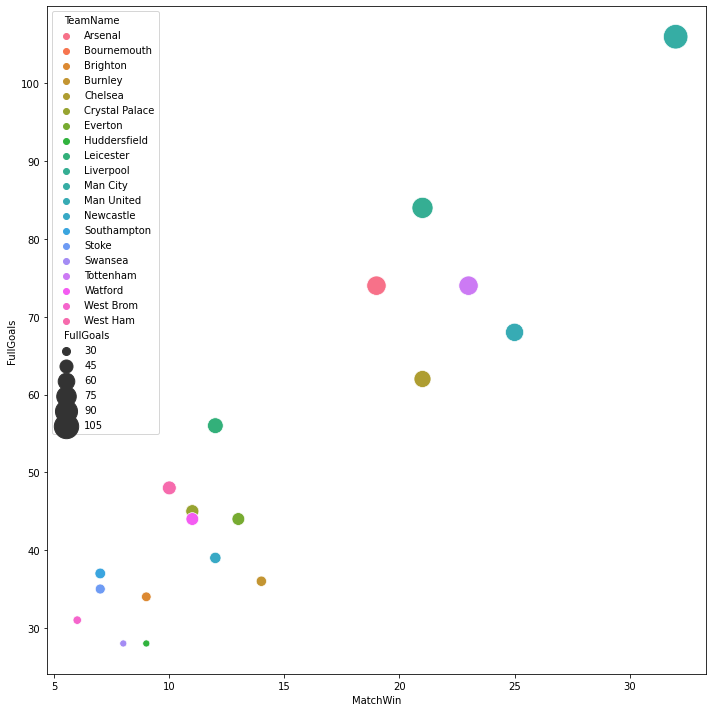

In [16]:
drawScatter(Summary_df[Summary_df['Season'] == '2017-18'])

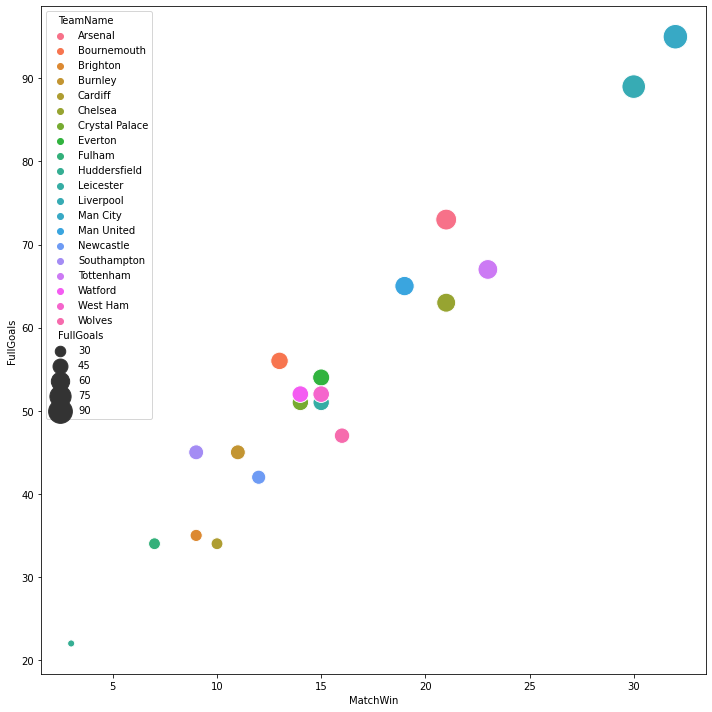

In [17]:
drawScatter(Summary_df[Summary_df['Season'] == '2018-19'])

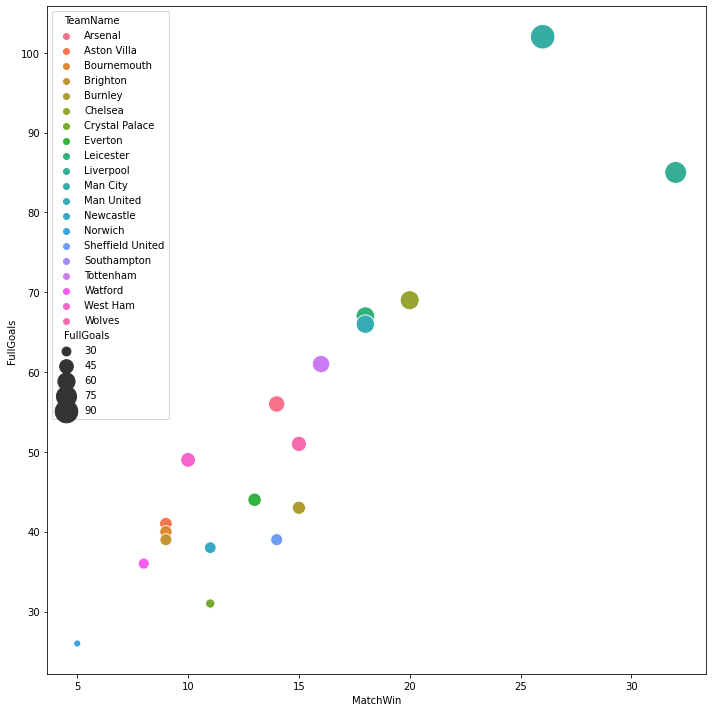

In [18]:
drawScatter(Summary_df[Summary_df['Season'] == '2019-20'])

- Cả 3 mùa giải gần đây, mối tương quan giữa số bàn thắng và số trận thắng đều tuân theo một hàm tuyến tính, bàn thắng càng nhiều thì hầu hết số lượng trận đấu chiến thắng càng lớn. Từ đây có thể áp dụng mô hình học máy để tính toán số lượng bàn thắng cần đạt được trong mùa giải tiếp theo